<a href="https://colab.research.google.com/github/Eternal7king/react-entertainment-hub/blob/master/Entertainment_hub_model_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entertainment-Hub Recommendation System Modal**
This is an AI model that I'm building to use in a school project which aims to give personalized recommendations to users based on user activities and preference.

Content Based Recommender System recommends movies similar to the movie user likes and analyses the sentiments on the reviews given by the user for that movie.


# **Source of Dataset**
 The following datasets are used for the project.

1. [TMDB MOVIE DATASET](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies)
2. [IMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset?resource=download)



In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/sample_dataset/TMDB_movie_dataset_v11.csv')
data .head()

In [ ]:
data1=pd.read_csv('/content/MV.csv')
data1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
data1.shape

(5043, 28)

In [ ]:
data1.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

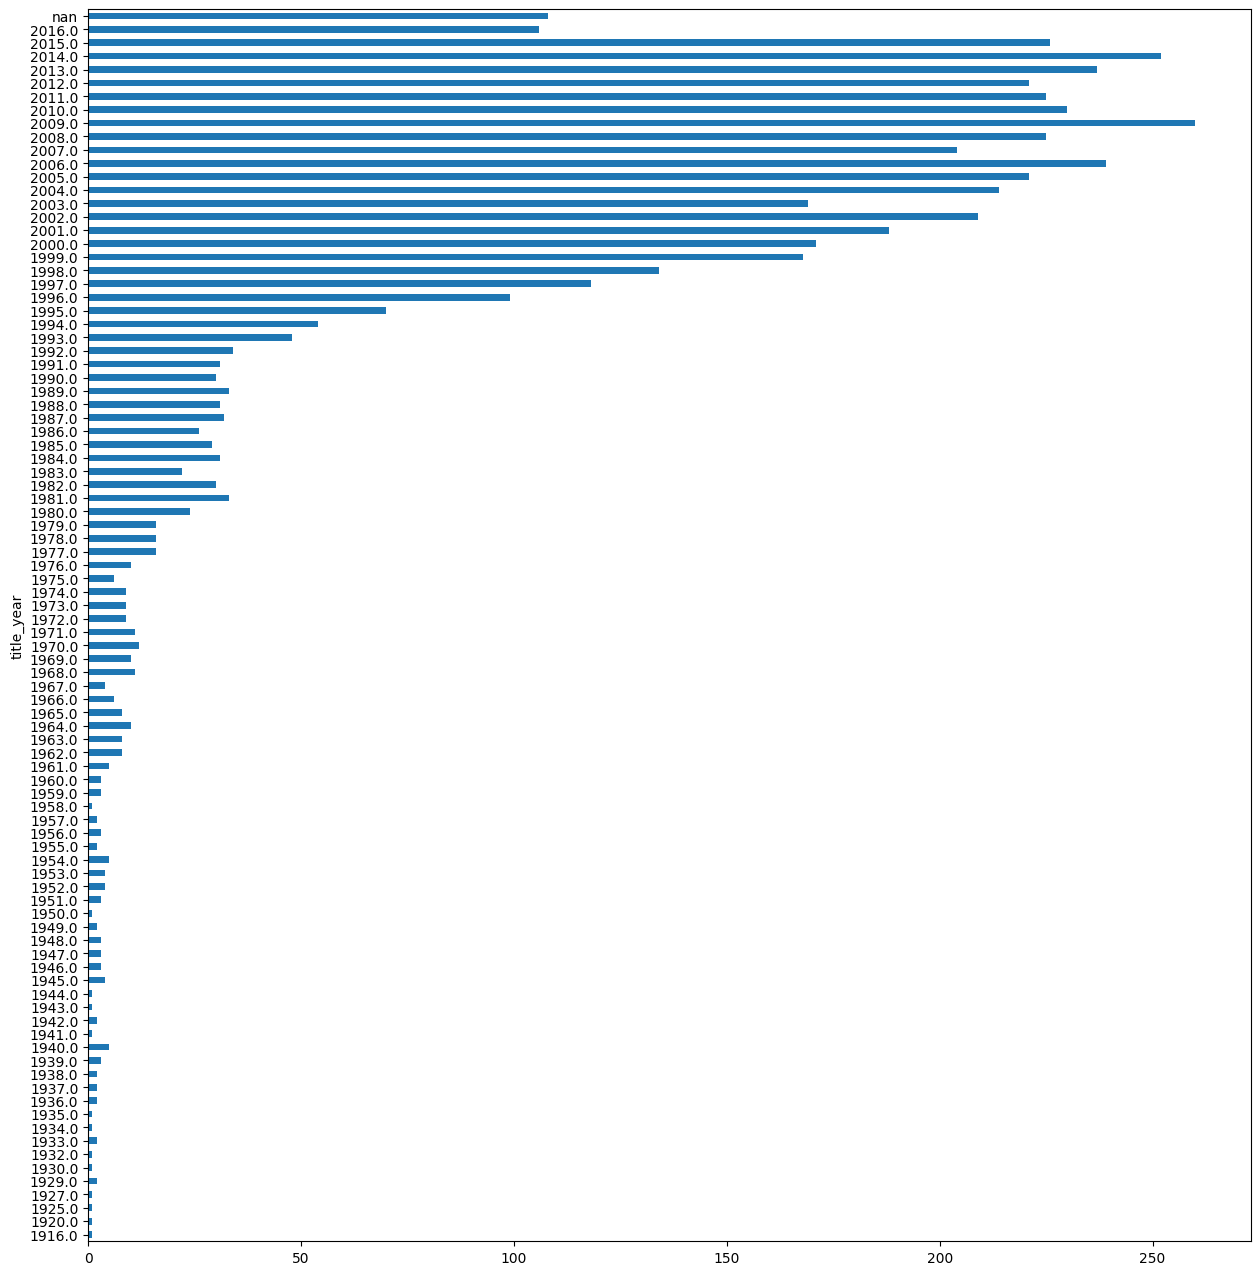

In [ ]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
data1.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [ ]:
# recommendation will be based on these features only
data1 = data1.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [ ]:
data1.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [ ]:
data1.isna().sum()

,0
director_name,104
actor_1_name,7
actor_2_name,13
actor_3_name,23
genres,0
movie_title,0


In [ ]:
data1['actor_1_name'] = data1['actor_1_name'].replace(np.nan, 'unknown')
data1['actor_2_name'] = data1['actor_2_name'].replace(np.nan, 'unknown')
data1['actor_3_name'] = data1['actor_3_name'].replace(np.nan, 'unknown')
data1['director_name'] = data1['director_name'].replace(np.nan, 'unknown')

In [ ]:
data1.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [ ]:
data1.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres,0
movie_title,0


In [ ]:
data1['genres'] = data1['genres'].str.replace('|', ' ')


In [ ]:
data1

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [ ]:
data1['movie_title'] = data1['movie_title'].str.lower()

In [ ]:
data1

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [ ]:
# null terminating char at the end
data1['movie_title'][21]

'the amazing spider-man\xa0'

In [ ]:
# removing the null terminating char at the end
data1['movie_title'] = data1['movie_title'].apply(lambda x : x[:-1])

In [ ]:
#let's check again
data1['movie_title'][21]

'the amazing spider-man'

In [ ]:
#let's save the processed dataset
data1.to_csv('data2.csv',index=False)

Download 2 Datasets from the following data source:

1. credit.csv
2. movies_metadata.csv

[The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)




In [ ]:
credits = pd.read_csv('/content/credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
meta = pd.read_csv('/content/movies_metadata.csv')

<ipython-input-6-5c3802c6ad91>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('/content/movies_metadata.csv')


In [ ]:
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN, if ‘raise’, then invalid parsing will raise an exception, If ‘ignore’, then invalid parsing will return the input

In [ ]:
#format the date
meta['year'] = meta['release_date'].dt.year

In [ ]:
meta['year'].value_counts().sort_index()

,count
year,
1874.0,1
1878.0,1
1883.0,1
1887.0,1
1888.0,2
...,...
2015.0,1905
2016.0,1604
2017.0,532


In [ ]:
# Getting only 2017 movies as we already have movies up to the year 2016 in data 1 processed file.
# We don't have enough data for the movies from 2018, 2019 and 2020.
# We'll deal with it in the upcoming preprocessing files
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [ ]:
new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [ ]:
new_meta.dtypes

,0
genres,object
id,object
title,object
year,float64


In [ ]:
#converting the "id" to integer
new_meta['id'] = new_meta['id'].astype(int)

In [ ]:
#add the new_meta data to the credit data. They all have "id" so we can merge on that.
data = pd.merge(new_meta, credits, on='id')

In [ ]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


In [ ]:
# we will convert the "genre", "cast" and "crew" column into a list. if we observe it carefully, we will realised that it's a list containing dictionary.
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))  #the "literal_eval" helps to convert the string into a list
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

# **GENRES**

In [ ]:
#Now we will have to take out the individual genres like adventure, action, sci-fi, etc. using the following function


def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction': #am only renaming the "Science Fiction" to "Sci-Fi" to make it the name shorter. Apart from that all other names remain the same.
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen)) #then we will join them together and return the valuse

In [ ]:
#now let's apply the function on the genre column

data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [ ]:
data['genres_list']

,genres_list
0,Adventure Action Fantasy Comedy
1,Action Adventure Fantasy Sci-Fi
2,Action Adventure Fantasy Sci-Fi
3,Action Adventure Comedy Sci-Fi
4,Fantasy Action Adventure
5,Thriller Adventure
6,Drama Comedy
7,Action Fantasy Sci-Fi
8,Comedy
9,Action Adventure Fantasy


# **ACTOR 1**

In [ ]:

#let's do the same for cast

def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [ ]:
#let's apply it on the cast column for the first actor

data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

**ACTOR 2**

In [ ]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [ ]:
#let's apply it on the cast column for the second actor
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [ ]:
data['actor_2_name']

,actor_2_name
0,Javier Bardem
1,Henry Cavill
2,Tom Hiddleston
3,Zoe Saldana
4,William Hurt
5,Sarah Mac
6,Melanie Chandra
7,Sanzhar Madiyev
8,Eden Sher
9,Chris Pine


**ACTOR 3**

In [ ]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [ ]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [ ]:
data['actor_3_name']

,actor_3_name
0,Geoffrey Rush
1,Gal Gadot
2,Cate Blanchett
3,Dave Bautista
4,Benjamin Walker
...,...
526,Tiitus Rantala
527,Gina Holden
528,NaN
529,Akshaye Khanna


**DIRECTORS**

In [ ]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [ ]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [ ]:
data['director_name']

,director_name
0,Joachim Rønning Espen Sandberg
1,Zack Snyder
2,Taika Waititi
3,James Gunn
4,Sean McNamara
...,...
526,Hannaleena Hauru
527,Jonathan A. Rosenbaum
528,Beth David Esteban Bravo
529,Ravi Udyawar


In [ ]:
#selecting only the prepared data
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]
movie

In [ ]:
movie.isna().sum()

In [ ]:
#drop missing values
movie = movie.dropna(how='any')

In [ ]:
movie.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres_list,0
title,0


In [ ]:
#renaming
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [ ]:
#convert all movie titles to lower case
movie['movie_title'] = movie['movie_title'].str.lower()

In [ ]:
#we will be using this information later on in the tfidvectorizor
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
old = pd.read_csv('data2.csv')
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [ ]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thr...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror ...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [ ]:
#putting all datasets together
new = pd.concat([old, movie], ignore_index=True)
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5496,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5497,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5498,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5499,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
#we are dropping the duplicated valuse and keeping only the last one, so that there will be only one type of a particular movie and not duplicates of same movie
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5496,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5497,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5498,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5499,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
#saving all the data up to 2017
new.to_csv('new_data.csv',index=False)

# Extracting features of 2018 movies from Wikipedia

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df =  pd.concat([df1,df2,df3,df4],ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3]
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4]
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5]
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6]
...,...,...,...,...,...,...
243,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",[237]
244,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions / Mosiac Media Group,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[142]
245,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[117]
246,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[207]


As it is observed in the above table, we do not have the genre column so we will get the genre data from IMDb. You will need to create an API key in order to access the API key.

In [ ]:
pip install tmdbv3api

In [ ]:
#get your API Key here: https://www.themoviedb.org/settings/api
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'b68598da82c7bef791968aa191b93ed1' #add your own API key here

In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x): #pass in the title of the movies
    genres = []
    result = tmdb_movie.search(x) #the title will be searched in the tmdb_movie
    movie_id = result[0].id #we will match the "id" with the "title"
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)) #we will get the result from the IMDb data
    data_json = response.json() #we will then convert it to a json file
    if data_json['genres']: #in the json file we will only need to extract the "genre"
        genre_str = " "
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name']) #we will then add the "genre" to the empty genre list we created above
        return genre_str.join(genres)
    else:
        np.NaN # we will return the results but if we don't find anything we will consider it as a missing value

In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],Horror Mystery Thriller
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3],Drama Mystery
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4],Action Thriller Mystery
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5],Thriller Action Crime
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6],Action Crime Thriller
...,...,...,...,...,...,...,...
243,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",[237],Romance Comedy
244,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions / Mosiac Media Group,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[142],Mystery Adventure Comedy Crime
245,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[117],Thriller Science Fiction Action Adventure
246,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[207],Drama History


In [ ]:
df_2018 = df[['Title','Cast and crew','genres']]
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,Drama Mystery
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",Action Thriller Mystery
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",Thriller Action Crime
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action Crime Thriller
...,...,...,...
243,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",Romance Comedy
244,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime
245,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure
246,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History


Extract Directors

In [ ]:
def get_director(x):
    if " (director)" in x: #we are getting "director"
        return x.split(" (director)")[0]
    elif " (directors)" in x: #we are getting "directors" with "s"
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0] #we are getting "directors/screenplay"

In [ ]:
#let's apply the above function on the "Cast and crew" column
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


<ipython-input-52-e4fd6ee00db5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [ ]:
df_2018

,Title,Cast and crew,genres,director_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller,Adam Robitel
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,Drama Mystery,Christopher Radcliff (director/screenplay); Lauren Wolkstein
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",Action Thriller Mystery,Jaume Collet-Serra
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",Thriller Action Crime,Babak Najafi
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action Crime Thriller,Brett Donowho
...,...,...,...,...
243,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",Romance Comedy,Peter Segal
244,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime,Etan Cohen
245,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure,Adam McKay
246,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History,Mimi Leder


Actor 1

In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

<ipython-input-55-94b1a1569c5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))


Actor 2

In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:

df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

<ipython-input-57-75f2be6b779a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


Actor 3

In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:

df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))


In [ ]:

df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,Drama Mystery,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",Thriller Action Crime,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action Crime Thriller,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore
...,...,...,...,...,...,...,...
243,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",Romance Comedy,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens
244,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
245,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure,Adam McKay,Christian Bale,Amy Adams,Steve Carell
246,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux


In [ ]:

df_2018 = df_2018.rename(columns={'Title':'movie_title'})


In [ ]:

new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:

new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama Mystery,The Strange Ones
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,Proud Mary
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,Acts of Violence
...,...,...,...,...,...,...
243,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,Romance Comedy,Second Act
244,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
245,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,Vice
246,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex


In [ ]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:

new_df18['movie_title'] = new_df18['movie_title'].str.lower()


In [ ]:

new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thri...
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama Mystery,the strange ones,Lauren Wolkstein (director); Alex Pettyfer James Freedson-Jackson Emily...
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thril...
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,proud mary,Taraji P. Henson Jahi Di'Allo Winston Billy Brown Babak Najafi Thriller...
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,acts of violence,Bruce Willis Cole Hauser Shawn Ashmore Brett Donowho Action Crime Thriller
...,...,...,...,...,...,...,...
243,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,Romance Comedy,second act,Jennifer Lopez Leah Remini Vanessa Hudgens Peter Segal Romance Comedy
244,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Mystery Adventure C...
245,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McKay Thriller Science Ficti...
246,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama History


# **Extracting features of 2019 movies from Wikipedia**

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df =pd.concat([df1,df2,df3,df4],ignore_index=True)


In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",[2]
1,J A N U A R Y,4,Rust Creek,IFC Films / Lunacy Productions,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",[3]
2,J A N U A R Y,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",[4]
3,J A N U A R Y,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,[5]
4,J A N U A R Y,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",[6]
...,...,...,...,...,...,...
245,D E C E M B E R,25,Spies in Disguise,20th Century Fox Animation / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",[133]
246,D E C E M B E R,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",[226]
247,D E C E M B E R,25,1917,Universal Pictures / DreamWorks Pictures,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,[227]
248,D E C E M B E R,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",[228]


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))


In [ ]:
df_2019 = df[['Title','Cast and crew','genres']]
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",Horror Thriller Mystery
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",Thriller Drama Action Crime
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,Drama Adventure Family
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",Comedy Drama
...,...,...,...
245,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",Animation Action Adventure Comedy Family
246,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",Drama Romance History
247,1917,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,War Action Drama History
248,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",Drama Crime History


Director

In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))


<ipython-input-73-a433a4faa834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))


Actor 1

In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


<ipython-input-75-eee71c5586b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


Actor 2

In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


<ipython-input-77-48d0aadc78c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


Actoe 3

In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))


In [ ]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})


In [ ]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()


In [ ]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']


In [ ]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Mystery,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Thrill...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama Action Crime,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama A...
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
...,...,...,...,...,...,...,...
245,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
246,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History
247,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Action Dr...
248,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [ ]:
my_df = pd.concat([new_df18,new_df19],ignore_index=True)
my_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thri...
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama Mystery,the strange ones,Lauren Wolkstein (director); Alex Pettyfer James Freedson-Jackson Emily...
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thril...
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,proud mary,Taraji P. Henson Jahi Di'Allo Winston Billy Brown Babak Najafi Thriller...
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,acts of violence,Bruce Willis Cole Hauser Shawn Ashmore Brett Donowho Action Crime Thriller
...,...,...,...,...,...,...,...
493,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
494,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History
495,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Action Dr...
496,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [ ]:
old_df = pd.read_csv('/content/new_data.csv')
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5359,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5360,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5361,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5362,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
final_df = pd.concat([old_df,my_df],ignore_index=True)
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5857,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
5858,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History
5859,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Action Dr...
5860,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [ ]:
final_df.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres,0
movie_title,0
comb,0


In [ ]:
final_df = final_df.dropna(how='any')

In [ ]:
final_df.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres,0
movie_title,0
comb,0


In [ ]:
final_df.to_csv('final_data.csv',index=False)

# Extracting features of 2020 movies from Wikipedia

In [ ]:
import pandas as pd
import numpy as np
import requests
import bs4 as bs
import urllib.request

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')


In [ ]:
tables = soup.find_all('table',class_='wikitable sortable')


In [ ]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

<ipython-input-96-872175cfe2ee>:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df1 = pd.read_html(str(tables[0]))[0]
<ipython-input-96-872175cfe2ee>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df2 = pd.read_html(str(tables[1]))[0]
<ipython-input-96-872175cfe2ee>:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df3 = pd.read_html(str(tables[2]))[0]
<ipython-input-96-872175cfe2ee>:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] 

In [ ]:
df = pd.concat([df1,df2,df3,df4],ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",[2]
1,J A N U A R Y,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",[3]
2,J A N U A R Y,10,Like a Boss,Paramount Pictures / Artists First,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",[4]
3,J A N U A R Y,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,NaN
4,J A N U A R Y,10,Inherit the Viper,Lionsgate / Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",[5]
...,...,...,...,...,...,...
271,D E C E M B E R,25,We Can Be Heroes,Netflix / Troublemaker Studios / Double R Productions,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",[244]
272,D E C E M B E R,25,News of the World,Universal Pictures / Playtone / Perfect World Pictures,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,[245]
273,D E C E M B E R,25,One Night in Miami...,Amazon Studios,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",[246]
274,D E C E M B E R,25,Promising Young Woman,Focus Features / FilmNation Entertainment,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",[247]


In [ ]:
df_2020 = df[['Title','Cast and crew']]


In [ ]:
df_2020.dtypes


,0
Title,object
Cast and crew,object


In [ ]:
df_2020

,Title,Cast and crew
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,..."
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,..."
...,...,...
271,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa..."
272,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...
273,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El..."
274,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis..."


In [ ]:
!pip install tmdbv3api

In [ ]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'b68598da82c7bef791968aa191b93ed1'

In [ ]:
from tmdbv3api import TMDb, Movie
import requests
import numpy as np
import pandas as pd

# Initialize TMDb API with your API key
tmdb = TMDb()
#tmdb.api_key = 'YOUR_API_KEY'
tmdb_movie = Movie()

def get_genre(title):
    try:
        # Search for the movie
        result = tmdb_movie.search(title)

        if not result:
            return np.NaN

        # Check if the result is an object and has the 'id' attribute
        movie = result[0]
        if not hasattr(movie, 'id'):
            return np.NaN

        movie_id = movie.id
        # Make the API request
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
        data_json = response.json()

        # Check if the genres field exists and is not empty
        if 'genres' in data_json and data_json['genres']:
            # Join genres with a comma
            return ", ".join([genre['name'] for genre in data_json['genres']])
        else:
            return np.NaN
    except Exception as e:
        print(f"Error processing title '{title}': {e}")
        return np.NaN

# Apply the function to the 'Title' column in your df_2020 DataFrame
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

# Display the DataFrame with the new 'genres' column
df_2020.head()


Error processing title 'No films had been released on this date as resulting the closure of theaters caused by the COVID-19 pandemic': getattr(): attribute name must be string
Error processing title 'The SpongeBob Movie: Sponge on the Run (Canadian theatrical release)': getattr(): attribute name must be string


<ipython-input-128-dd5e6ea80505>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))


,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...","Horror, Mystery, Thriller"
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...","Horror, Science Fiction, Action, Adventure"
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...","Crime, Thriller, Drama"


In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie()
result = tmdb_movie.search('Pieces of a Woman')
print(result)

{'page': 1, 'results': [{'adult': False, 'backdrop_path': '/izNpxVcjKbF9BiYF4GVqxCOfewL.jpg', 'genre_ids': [18], 'id': 641662, 'original_language': 'en', 'original_title': 'Pieces of a Woman', 'overview': "When a young mother's home birth ends in unfathomable tragedy, she begins a year-long odyssey of mourning that fractures relationships with loved ones in this deeply personal story of a woman learning to live alongside her loss.", 'popularity': 22.124, 'poster_path': '/OgUfLlhfBFx5BPK6LzBWFvBW1w.jpg', 'release_date': '2020-12-30', 'title': 'Pieces of a Woman', 'video': False, 'vote_average': 7.04, 'vote_count': 1182}, {'adult': False, 'backdrop_path': '/t2Q34sUhzSlwt6WfnFE1YXP2SQs.jpg', 'genre_ids': [36, 53], 'id': 1135095, 'original_language': 'en', 'original_title': 'Pieces of a woman', 'overview': 'After her friend mysteriously disappears, a young woman is looking for her imaginary friend in a dream.', 'popularity': 0.539, 'poster_path': '/wvFSGKsXriLDlk1qlCOLWbr2hye.jpg', 'releas

In [ ]:
df_2020

,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...","Horror, Mystery, Thriller"
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...","Horror, Science Fiction, Action, Adventure"
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...","Crime, Thriller, Drama"
...,...,...,...
271,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...","Family, Action, Fantasy, Comedy"
272,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,"Drama, Western, Adventure"
273,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama
274,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...","Thriller, Crime, Drama"


In [ ]:
df_2020

,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...","Horror, Mystery, Thriller"
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...","Horror, Science Fiction, Action, Adventure"
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...","Crime, Thriller, Drama"
...,...,...,...
271,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...","Family, Action, Fantasy, Comedy"
272,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,"Drama, Western, Adventure"
273,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama
274,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...","Thriller, Crime, Drama"


***Extract Director***

In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

<ipython-input-133-bc52fe9b0c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))


*Actor 1*

In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))


<ipython-input-135-42c5f763f942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))


*Actor2*

In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))


*Actor3*

In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [ ]:
df_2020

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...","Horror, Mystery, Thriller",Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...","Horror, Science Fiction, Action, Adventure",William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...","Crime, Thriller, Drama",Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
271,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...","Family, Action, Fantasy, Comedy",Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
272,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,"Drama, Western, Adventure",Paul Greengrass,Tom Hanks,Helena Zengel,NaN
273,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
274,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...","Thriller, Crime, Drama",Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [ ]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})


In [ ]:
# Check the columns of df_2020 to see if 'genres' or a variation of it exists
print(df_2020.columns)


Index(['movie_title', 'Cast and crew', 'genres', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name'],
      dtype='object')


In [ ]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,"Horror, Mystery, Thriller",The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,"Horror, Science Fiction, Action, Adventure",Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,Three Christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,"Crime, Thriller, Drama",Inherit the Viper
...,...,...,...,...,...,...
271,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,"Family, Action, Fantasy, Comedy",We Can Be Heroes
272,Paul Greengrass,Tom Hanks,Helena Zengel,NaN,"Drama, Western, Adventure",News of the World
273,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,One Night in Miami...
274,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,"Thriller, Crime, Drama",Promising Young Woman


In [ ]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']


In [ ]:
new_df20.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,5
actor_3_name,28
genres,2
movie_title,0
comb,29


In [ ]:
new_df20 = new_df20.dropna(how='any')

In [ ]:
new_df20.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres,0
movie_title,0
comb,0


In [ ]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

<ipython-input-149-83e83e91073b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df20['movie_title'] = new_df20['movie_title'].str.lower()


In [ ]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,"Horror, Mystery, Thriller",the grudge,"Andrea Riseborough Demián Bichir John Cho Nicolas Pesce Horror, Mystery..."
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,"Horror, Science Fiction, Action, Adventure",underwater,"Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Horror, S..."
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon Avnet Drama
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,"Crime, Thriller, Drama",inherit the viper,"Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Crime, Th..."
...,...,...,...,...,...,...,...
270,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,"Animation, Family, Comedy, Fantasy",soul,"Jamie Foxx Tina Fey Graham Norton Pete Docter Animation, Family, Comedy..."
271,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,"Family, Action, Fantasy, Comedy",we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Famil...
273,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
274,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,"Thriller, Crime, Drama",promising young woman,"Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller, Crime, ..."


In [ ]:
old_df = pd.read_csv('final_data.csv')

In [ ]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5857,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
5858,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance History
5859,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama History,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Action Dr...
5860,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [ ]:
final_df =pd.concat([old_df,new_df20],ignore_index=True)


In [ ]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
6104,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,"Animation, Family, Comedy, Fantasy",soul,"Jamie Foxx Tina Fey Graham Norton Pete Docter Animation, Family, Comedy..."
6105,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,"Family, Action, Fantasy, Comedy",we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Famil...
6106,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
6107,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,"Thriller, Crime, Drama",promising young woman,"Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller, Crime, ..."


In [ ]:
final_df.to_csv('main_data.csv',index=False)

Dwonload reviews.txt

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
dataset = pd.read_csv('reviews.txt', sep = '\t', names =['Reviews','Comments'])

In [ ]:
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Re..."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [ ]:
stopset = set(stopwords.words('english'))

In [ ]:
stopset=list(stopset)
#stopset = set(stopset)

In [ ]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

In [ ]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
accuracy_score(y_test,clf.predict(X_test))*100


97.47109826589595

In [ ]:
#we will be using this model for sentiment analysis
pickle.dump(clf, open('nlp_model.pkl', 'wb'))